In [42]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df=pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [44]:
df.shape

(6362620, 11)

#### Reducing memory size to process large amount of data

In [74]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object and col_type.name != 'category':
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [75]:
def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file,usecols=['step','type',	'amount','oldbalanceOrg',	'newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud'])
    df = reduce_mem_usage(df)
    return df

In [76]:
dfx=import_data('Fraud.csv')

Memory usage of dataframe is 436.89 MB
Memory usage after optimization is: 151.70 MB
Decreased by 65.3%


In [77]:
dfx

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9.839640e+03,170136.000,160296.359375,0.000000e+00,0.000,0,0
1,1,PAYMENT,1.864280e+03,21249.000,19384.720703,0.000000e+00,0.000,0,0
2,1,TRANSFER,1.810000e+02,181.000,0.000000,0.000000e+00,0.000,1,0
3,1,CASH_OUT,1.810000e+02,181.000,0.000000,2.118200e+04,0.000,1,0
4,1,PAYMENT,1.166814e+04,41554.000,29885.859375,0.000000e+00,0.000,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,3.396821e+05,339682.125,0.000000,0.000000e+00,339682.125,1,0
6362616,743,TRANSFER,6.311410e+06,6311409.500,0.000000,0.000000e+00,0.000,1,0
6362617,743,CASH_OUT,6.311410e+06,6311409.500,0.000000,6.848884e+04,6379898.000,1,0
6362618,743,TRANSFER,8.500025e+05,850002.500,0.000000,0.000000e+00,0.000,1,0


In [73]:
dfx.shape

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9.839640e+03,170136.000,160296.359375,0.000000e+00,0.000
1,1.864280e+03,21249.000,19384.720703,0.000000e+00,0.000
2,1.810000e+02,181.000,0.000000,0.000000e+00,0.000
3,1.810000e+02,181.000,0.000000,2.118200e+04,0.000
4,1.166814e+04,41554.000,29885.859375,0.000000e+00,0.000
...,...,...,...,...,...
6362615,3.396821e+05,339682.125,0.000000,0.000000e+00,339682.125
6362616,6.311410e+06,6311409.500,0.000000,0.000000e+00,0.000
6362617,6.311410e+06,6311409.500,0.000000,6.848884e+04,6379898.000
6362618,8.500025e+05,850002.500,0.000000,0.000000e+00,0.000


In [72]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
dtypes: float64(5)
memory usage: 242.7 MB


In [51]:
dfx.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<AxesSubplot:>

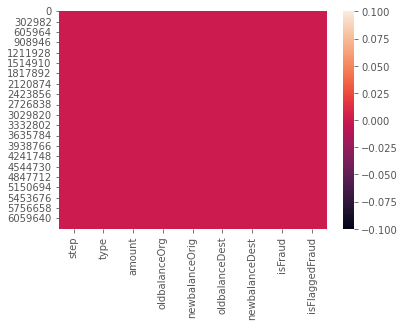

In [52]:
sns.heatmap(dfx.isnull())

# Exploratory Data Analysis

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

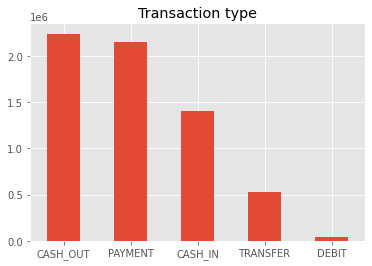

In [53]:
plt.style.use('ggplot')
dfx['type'].value_counts().plot.bar(title='Transaction type',rot=0)
display(dfx['type'].value_counts())

0    6354407
1       8213
Name: isFraud, dtype: int64

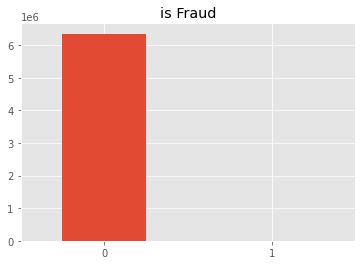

In [54]:
plt.style.use('ggplot')
dfx['isFraud'].value_counts().plot.bar(title='is Fraud',rot=0)
display(dfx['isFraud'].value_counts())

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

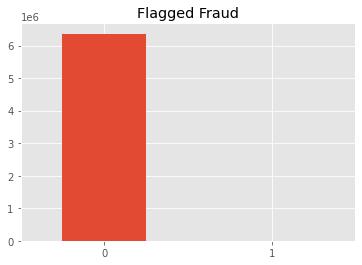

In [55]:
plt.style.use('ggplot')
dfx['isFlaggedFraud'].value_counts().plot.bar(title='Flagged Fraud',rot=0)
display(dfx['isFlaggedFraud'].value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

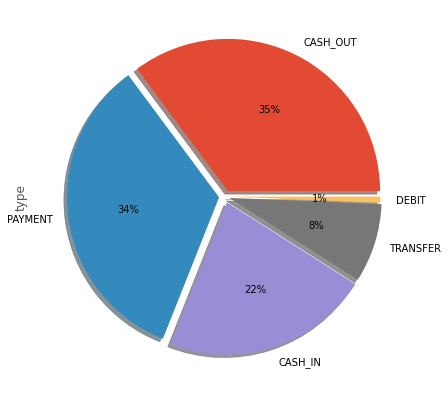

In [56]:
fig = plt.figure(figsize =(10, 7))
explode = (0.04, 0.04, 0.04,0.03,0.02)

dfx['type'].value_counts().plot.pie(autopct='%1.0f%%',explode=explode,shadow=True)
                                
display(dfx['type'].value_counts())

In [60]:
dfx.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.639648,170136.0,160296.359375,0.0,0.0,0,0
1,1,3,1864.280029,21249.0,19384.720703,0.0,0.0,0,0
2,1,4,181.000000,181.0,0.000000,0.0,0.0,1,0
3,1,1,181.000000,181.0,0.000000,21182.0,0.0,1,0
4,1,3,11668.139648,41554.0,29885.859375,0.0,0.0,0,0


### Data Cleaning

In [57]:
dfx['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [78]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

dfx['type']=le.fit_transform(dfx['type'])

In [79]:
dfx.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.639648,170136.0,160296.359375,0.0,0.0,0,0
1,1,3,1864.280029,21249.0,19384.720703,0.0,0.0,0,0
2,1,4,181.000000,181.0,0.000000,0.0,0.0,1,0
3,1,1,181.000000,181.0,0.000000,21182.0,0.0,1,0
4,1,3,11668.139648,41554.0,29885.859375,0.0,0.0,0,0


- 0- CASH-IN
- 1- CASH-OUT
- 2- DEBIT
- 3- PAYMENT
- 4- TRANSFER

In [80]:
dff=dfx.copy()
dff.drop(['isFlaggedFraud'],axis=1,inplace=True)
dff.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.639648,170136.0,160296.359375,0.0,0.0,0
1,1,3,1864.280029,21249.0,19384.720703,0.0,0.0,0
2,1,4,181.000000,181.0,0.000000,0.0,0.0,1
3,1,1,181.000000,181.0,0.000000,21182.0,0.0,1
4,1,3,11668.139648,41554.0,29885.859375,0.0,0.0,0


### Modeling and splitting data

In [88]:
# Assigning values to x and y
X=dff.drop(['isFraud'],axis=1)
y=dff['isFraud']

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

## How did you select variables to be included in the model?

#### Ans- As we need our model to predict whether the transaction is fraud or not so based upon given columns I filtered out the required columns-
  1. WHY steps? bacause it can be used for calculating days 
  2. WHY type? because it can be used as an input for predicting data
  3. WHY amount? because it can be used as an important aspect for calculating differences after transaction and also its one of the important given parameters. 
  4. WHY oldbalanceOrg? because it can be used to keep track of the old balance origin.
  5. WHY newbalanceOrig? because it can be used to keep track of the new balance origin.
  6. WHY oldbalanceDest? because it can be used to keep track of the old balace at destination side.
  7. WHY newbalanceDest? because it can be used to keep track of the new balace at destination side.
  8. WHY isFraud? to identify fraud based on identity of 1 and 0.

In [70]:
print(X_train.shape)
print(X_test.shape)

(5090096, 7)
(1272524, 7)


In [90]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.639648,170136.0,160296.359375,0.0,0.0
1,1,3,1864.280029,21249.0,19384.720703,0.0,0.0
2,1,4,181.000000,181.0,0.000000,0.0,0.0
3,1,1,181.000000,181.0,0.000000,21182.0,0.0
4,1,3,11668.139648,41554.0,29885.859375,0.0,0.0


In [91]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int8

### What are the key factors that predict fraudulent customer?
- amount	
- oldbalanceOrg	
- newbalanceOrig	
- oldbalanceDest	
- newbalanceDest

### Do these factors make sense? If yes, How? If not, How not?

* ANS - yes, those factors justifies the model performance perfectly and also gives accurate results as all those factors ceertainly defines the FRAUD categ 

### RandomForest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
model=RandomForestClassifier(n_estimators=50)

In [92]:
model.fit(X_train,y_train.ravel())

RandomForestClassifier(n_estimators=50)

In [93]:
y_pred=model.predict(X_test)

In [94]:
y_test.shape

(1272524,)

In [96]:
from sklearn.metrics import accuracy_score
print("Model Accuracy ",accuracy_score(y_test,y_pred))

Model Accuracy  0.999725741911351


In [97]:
from sklearn.metrics import average_precision_score
print(average_precision_score(y_test,y_pred))

0.7851605642902464


In [98]:
res=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
res

,Actual,Predicted
3737323,0,0
264914,0,0
85647,0,0
5899326,0,0
2544263,0,0
...,...,...
2210524,0,0
956542,0,0
5474798,0,0
878120,0,0


In [144]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{confusion}")


# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())

Confusion matrix:
[[1270877      27]
 [    322    1298]]

Normalized confusion matrix:
[9.99978755e-01 2.12447203e-05]
[0.19876543 0.80123457]


In [145]:
from sklearn.metrics import classification_report

target_names=['Is Fraud','Not Fraud']

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Is Fraud       1.00      1.00      1.00   1270904
   Not Fraud       0.98      0.80      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [99]:
import pickle
# now you can save it to a file
file = 'predictor.pkl'
with open(file, 'wb') as f:
    pickle.dump(model, f)

In [100]:
with open(file, 'rb') as f:
    k = pickle.load(f)

In [131]:
y_pred2 = k.predict([[	100,	3,	0.0,	1666.0,	0.0,4323.0, 10000.0]])
print(y_pred2)

[1]


E:\ML_code\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


- Model is predicting 1 i.e. 'FRAUD' for above input

### KNN Classifier

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [136]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [137]:
y_pred2=neigh.predict(X_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [138]:
from sklearn.metrics import accuracy_score
print("Model Accuracy",accuracy_score(y_test,y_pred2))

Model Accuracy 0.9994860607737064


In [139]:
res=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
res

,Actual,Predicted
3737323,0,0
264914,0,0
85647,0,0
5899326,0,0
2544263,0,0
...,...,...
2210524,0,0
956542,0,0
5474798,0,0
878120,0,0


In [143]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred2)
print(f"Confusion matrix:\n{confusion}")


# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())

Confusion matrix:
[[1270795     109]
 [    545    1075]]

Normalized confusion matrix:
[9.99914234e-01 8.57657227e-05]
[0.33641975 0.66358025]


In [142]:
from sklearn.metrics import classification_report

target_names=['Is Fraud','Not Fraud']

print(classification_report(y_test, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

    Is Fraud       1.00      1.00      1.00   1270904
   Not Fraud       0.91      0.66      0.77      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.83      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



In [146]:
from sklearn.metrics import average_precision_score
print(average_precision_score(y_test,y_pred2))

0.6029187940332559


- As buy looking at the results we can say that RandomForest is providing better accuracy score than that of KNN.

### What kind of prevention should be adopted while company update its infrastructure? 

* Ans- I'm assuming Infrastructure as in terms of technology used for doing/making transactions. Many adaption can be made in terms of security by adding different layers of encryption techniques or in terms of two steps verification methodlogies.

### Assuming these actions have been implemented, how would you determine if they work?

* Ans- Well, these can be implemented easily as an web application and so based upon certain inputs i.e. our X variable input values can be taken from user and based on that prediction will be displayed